In [ ]:
# First cell in your Colab notebook:
!pip install --upgrade --force-reinstall \
    protobuf==5.26.1 \
    fsspec==2025.3.2 \
    pydrive2==1.21.3 \
    pyopenssl==24.2.1 \
    grpcio-status==1.71.0 \
    flwr[simulation] \
    flwr-datasets[vision] \
    torch \
    torchvision \
    matplotlib

  Using cached cryptography-41.0.5-cp37-abi3-manylinux_2_28_x86_64.whl.metadata (5.2 kB)
  Using cached protobuf-5.26.1-cp37-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached PyDrive2-1.21.3-py3-none-any.whl.metadata (7.0 kB)
  Using cached pyOpenSSL-24.2.1-py3-none-any.whl.metadata (13 kB)
  Using cached grpcio_status-1.71.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached torch-2.7.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached flwr-1.18.0-py3-none-any.whl.metadata (15 kB)
  Using cached flwr_datasets-0.5.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached cffi-1.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached google_api_python_client-

In [ ]:
# First, reset the environment (run this in a fresh Colab runtime)
!pip install --upgrade pip
!pip install --force-reinstall "cryptography<44" "protobuf<4" "flwr[simulation]==1.4.0" "flwr-datasets[vision]" torch torchvision matplotlib

# Then install other dependencies with compatible versions
!pip install "pydrive2==1.21.3" "pyopenssl==24.2.1" "grpcio-status==1.71.0" "fsspec==2025.3.2"

  Using cached cryptography-43.0.3-cp39-abi3-manylinux_2_28_x86_64.whl.metadata (5.4 kB)
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
  Using cached flwr-1.4.0-py3-none-any.whl.metadata (12 kB)
  Using cached torch-2.7.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached flwr_datasets-0.5.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached grpcio-1.71.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached iterators-0.0.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached ray-2.44.1-cp311-cp311-manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached cffi-1.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2

  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl (319 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flwr 1.4.0 requires protobuf<4.0.0,>=3.19.0, but you have protobuf 5.29.4 which is incompatible.
datasets 3.1.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
torchaudio 2.

In [1]:
# Fix each conflict individually:
!pip install --upgrade cryptography==41.0.5
!pip install --upgrade protobuf==5.26.1
!pip install --upgrade fsspec==2025.3.2
!pip install --upgrade pydrive2==1.21.3
!pip install --upgrade pyopenssl==24.2.1
!pip install --upgrade grpcio-status==1.71.0

In [2]:
import flwr
print("Flower version:", flwr.__version__)
import torch
print("PyTorch version:", torch.__version__)

Flower version: 1.4.0
PyTorch version: 2.7.0+cu126


In [3]:
# Step 2: Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from collections import OrderedDict
from typing import List, Tuple, Dict, Optional

import flwr as fl
from flwr.common import Metrics, NDArrays, Scalar
from flwr_datasets import FederatedDataset
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [4]:
# Set device (use GPU if available in Colab)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")


Using device: cpu


In [5]:
# Step 3: Define visualization functions
def plot_sample_images(dataloader: DataLoader, title: str = "Sample Images") -> None:
    """Plot a grid of sample images from a DataLoader"""
    batch = next(iter(dataloader))
    images, labels = batch["img"], batch["label"]
    images = images[:8]  # Show first 8 images
    labels = labels[:8]

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

    # Denormalize images
    images = images / 2 + 0.5  # Reverse Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))

    # Create grid
    grid = make_grid(images, nrow=4)
    plt.figure(figsize=(8, 4))
    plt.imshow(grid.permute(1, 2, 0))
    plt.title(f"{title} (Labels: {[class_names[l] for l in labels]})")
    plt.axis('off')
    plt.show()

In [9]:
def show_class_distribution(dataset, title):
    """Show class distribution in a dataset"""
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']
    counts = {name: 0 for name in class_names}

    # Convert dataset to list to handle both iterable and non-iterable cases
    data_list = list(dataset)

    for item in data_list:
        label = item["label"]
        # Handle both single labels and lists of labels
        if isinstance(label, (list, np.ndarray, torch.Tensor)):  # Batch of labels
            for l in label:
                counts[class_names[l]] += 1
        else:  # Single label
            counts[class_names[label]] += 1

    plt.figure(figsize=(10, 5))
    plt.bar(counts.keys(), counts.values())
    plt.title(f"Class Distribution - {title}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# And update your load_datasets function to ensure proper batching:
def load_datasets(partition_id: int, num_partitions: int):
    """Load and partition CIFAR-10 dataset."""
    fds = FederatedDataset(dataset="cifar10", partitioners={"train": num_partitions})
    partition = fds.load_partition(partition_id)
    partition_train_test = partition.train_test_split(test_size=0.2, seed=42)

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    def apply_transforms(batch):
        batch["img"] = [transform(img) for img in batch["img"]]
        # Ensure labels are always in list format
        if isinstance(batch["label"], (int, np.integer)):
            batch["label"] = [batch["label"]]
        return batch

    partition_train_test = partition_train_test.with_transform(apply_transforms)

    # Show sample images and class distribution
    if partition_id == 0:
        # Create temporary DataLoader to get proper batches
        temp_loader = DataLoader(partition_train_test["train"], batch_size=32)
        plot_sample_images(temp_loader, f"Client {partition_id} Training Samples")
        show_class_distribution(partition_train_test["train"], f"Client {partition_id} Train")

    trainloader = DataLoader(partition_train_test["train"], batch_size=32, shuffle=True)
    valloader = DataLoader(partition_train_test["test"], batch_size=32)
    testloader = DataLoader(fds.load_split("test").with_transform(apply_transforms), batch_size=32)

    return trainloader, valloader, testloader

In [10]:
def plot_metrics(history: dict) -> None:
    """Plot training metrics across rounds"""
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history['round'], history['accuracy'], 'b-', label='Client Accuracy')
    if 'centralized_accuracy' in history:
        plt.plot(history['round'], history['centralized_accuracy'], 'r-', label='Server Accuracy')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Round')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history['round'], history['loss'], 'b-', label='Client Loss')
    if 'centralized_loss' in history:
        plt.plot(history['round'], history['centralized_loss'], 'r-', label='Server Loss')
    plt.xlabel('Round')
    plt.ylabel('Loss')
    plt.title('Loss vs. Round')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [11]:
# Step 4: Define the model architecture
class CIFAR10Net(nn.Module):
    """Simple CNN for CIFAR-10 classification."""
    def __init__(self) -> None:
        super(CIFAR10Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
# Step 5: Data loading and preprocessing
def load_datasets(partition_id: int, num_partitions: int):
    """Load and partition CIFAR-10 dataset."""
    fds = FederatedDataset(dataset="cifar10", partitioners={"train": num_partitions})
    partition = fds.load_partition(partition_id)
    partition_train_test = partition.train_test_split(test_size=0.2, seed=42)

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    def apply_transforms(batch):
        batch["img"] = [transform(img) for img in batch["img"]]
        # Ensure labels are in a list/tensor format
        if isinstance(batch["label"], (int, np.integer)):
            batch["label"] = [batch["label"]]
        return batch

    partition_train_test = partition_train_test.with_transform(apply_transforms)

    # Show sample images and class distribution
    if partition_id == 0:  # Only show for first client to avoid repetition
        plot_sample_images(DataLoader(partition_train_test["train"], batch_size=32), f"Client {partition_id} Training Samples")
        show_class_distribution(partition_train_test["train"], f"Client {partition_id} Train")
        show_class_distribution(partition_train_test["test"], f"Client {partition_id} Validation")
    # Create DataLoaders
    trainloader = DataLoader(partition_train_test["train"], batch_size=32, shuffle=True)
    valloader = DataLoader(partition_train_test["test"], batch_size=32)

    # Load test set (centralized evaluation)
    testset = fds.load_split("test").with_transform(apply_transforms)
    testloader = DataLoader(testset, batch_size=32)

    return trainloader, valloader, testloader


In [13]:
# Step 6: Training and evaluation functions
def train(net: nn.Module, trainloader: DataLoader, epochs: int) -> None:
    """Train the model for one epoch."""
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters())
    net.train()

    for epoch in range(epochs):
        correct, total, epoch_loss = 0, 0, 0.0
        for batch in trainloader:
            images, labels = batch["img"], batch["label"]
            images, labels = images.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # Metrics
            epoch_loss += loss.item()
            total += labels.size(0)
            correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()

        epoch_loss /= len(trainloader.dataset)
        epoch_acc = correct / total
        print(f"Epoch {epoch+1}: loss {epoch_loss:.4f}, accuracy {epoch_acc:.4f}")

def test(net: nn.Module, testloader: DataLoader) -> Tuple[float, float]:
    """Evaluate the model on the test set."""
    criterion = nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    net.eval()

    with torch.no_grad():
        for batch in testloader:
            images, labels = batch["img"], batch["label"]
            images, labels = images.to(DEVICE), labels.to(DEVICE)

            outputs = net(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    loss /= len(testloader.dataset)
    accuracy = correct / total
    return loss, accuracy

In [14]:
# Step 7: Flower Client
# Correct Flower Client implementation
class FlowerClient(fl.client.NumPyClient):
    def __init__(self, net: nn.Module, trainloader: DataLoader, valloader: DataLoader):
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self, config: Dict[str, Scalar]) -> NDArrays:
        return [val.cpu().numpy() for _, val in self.net.state_dict().items()]

    def set_parameters(self, parameters: NDArrays) -> None:
        params_dict = zip(self.net.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
        self.net.load_state_dict(state_dict, strict=True)

    def fit(self, parameters: NDArrays, config: Dict[str, Scalar]) -> Tuple[NDArrays, int, Dict[str, Scalar]]:
        self.set_parameters(parameters)
        train(self.net, self.trainloader, epochs=config.get("epochs", 1))
        return self.get_parameters({}), len(self.trainloader), {}

    def evaluate(self, parameters: NDArrays, config: Dict[str, Scalar]) -> Tuple[float, int, Dict[str, Scalar]]:
        self.set_parameters(parameters)
        loss, accuracy = test(self.net, self.valloader)
        return float(loss), len(self.valloader), {"accuracy": float(accuracy)}

# Correct client_fn implementation
def client_fn(cid: str) -> fl.client.Client:
    """Create and return a Flower Client"""
    net = CIFAR10Net().to(DEVICE)
    partition_id = int(cid)
    num_partitions = 10

    trainloader, valloader, _ = load_datasets(partition_id, num_partitions)
    return FlowerClient(net, trainloader, valloader)  # Remove .to_client() call

In [15]:
# Step 8: Define metric aggregation
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    """Aggregate metrics by weighting them by the number of examples."""
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]
    return {"accuracy": sum(accuracies) / sum(examples)}


In [16]:
# Step 9: Main simulation function
def main():
    """Run federated learning simulation with visualization"""
    # Load test set and visualize
    _, _, testloader = load_datasets(0, 1)
    plot_sample_images(testloader, "Test Set Samples")
    # Initialize history tracker
    history = {
        'round': [],
        'accuracy': [],
        'loss': [],
        'centralized_accuracy': [],
        'centralized_loss': []
    }

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


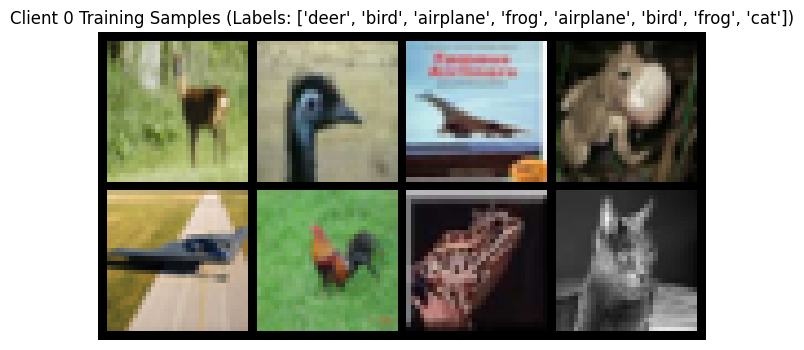

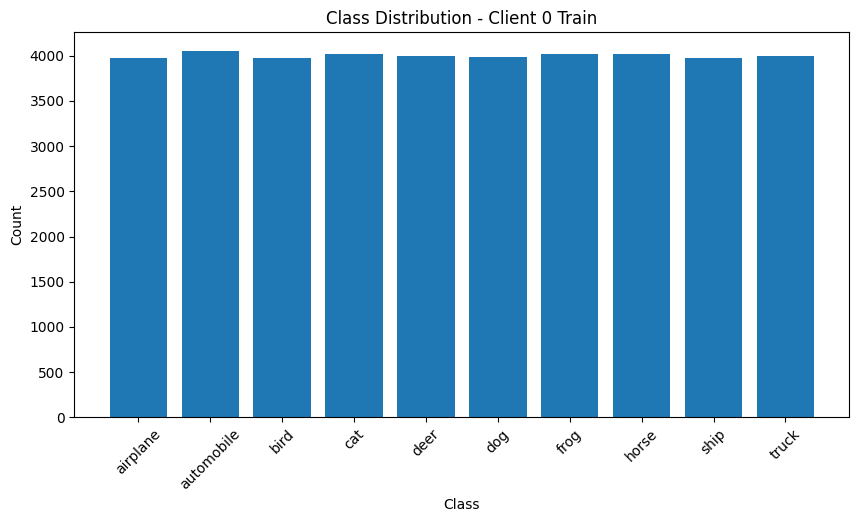

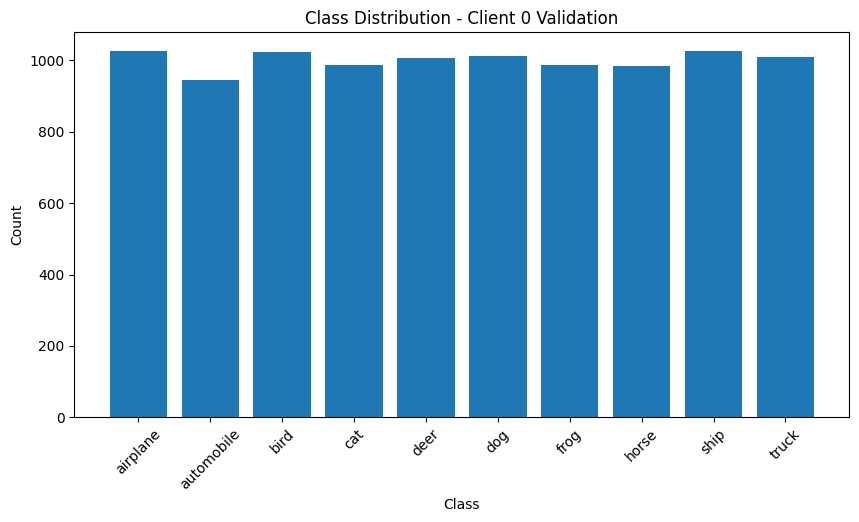

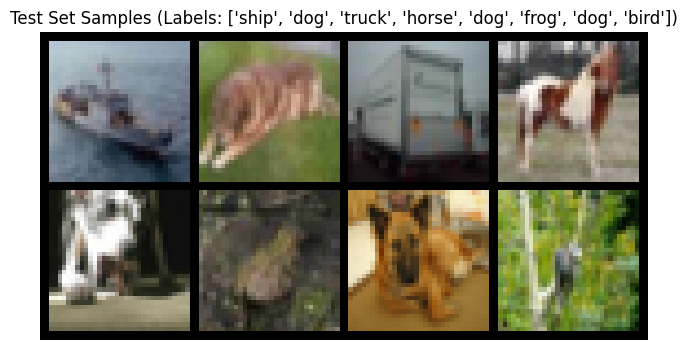

INFO flwr 2025-04-24 22:25:44,393 | app.py:146 | Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)


Starting Federated Learning Simulation...


2025-04-24 22:25:48,903	INFO worker.py:1852 -- Started a local Ray instance.
INFO flwr 2025-04-24 22:25:51,623 | app.py:180 | Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'object_store_memory': 3992142643.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'memory': 9314999501.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'object_store_memory': 3992142643.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'memory': 9314999501.0}
INFO flwr 2025-04-24 22:25:51,639 | server.py:86 | Initializing global parameters
INFO:flwr:Initializing global parameters
INFO flwr 2025-04-24 22:25:51,643 | server.py:273 | Requesting initial parameters from one random client
INFO:flwr:Requesting initial parameters from one random client
(pid=42967) 2025-04-24 22:25:55.254409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pi

Server evaluation - Round 0: Loss 0.0721, Accuracy 0.1054
(launch_and_fit pid=42967) Epoch 1: loss 0.0660, accuracy 0.2090
(launch_and_fit pid=42967) Epoch 1: loss 0.0654, accuracy 0.2240
(launch_and_fit pid=42967) Epoch 1: loss 0.0650, accuracy 0.2333
(launch_and_fit pid=42967) Epoch 1: loss 0.0648, accuracy 0.2205
(launch_and_fit pid=42967) Epoch 1: loss 0.0649, accuracy 0.2357
(launch_and_fit pid=42967) Epoch 1: loss 0.0656, accuracy 0.2220
(launch_and_fit pid=42967) Epoch 1: loss 0.0646, accuracy 0.2303
(launch_and_fit pid=42967) Epoch 1: loss 0.0654, accuracy 0.2210
(launch_and_fit pid=42967) Epoch 1: loss 0.0651, accuracy 0.2215
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)


DEBUG flwr 2025-04-24 22:27:10,788 | server.py:232 | fit_round 1 received 10 results and 0 failures
DEBUG:flwr:fit_round 1 received 10 results and 0 failures
WARNING flwr 2025-04-24 22:27:10,806 | fedavg.py:243 | No fit_metrics_aggregation_fn provided


(launch_and_fit pid=42967) Epoch 1: loss 0.0656, accuracy 0.2095


INFO flwr 2025-04-24 22:27:17,386 | server.py:119 | fit progress: (1, 0.06210065103769302, {'accuracy': 0.3071}, 61.55902484800026)
INFO:flwr:fit progress: (1, 0.06210065103769302, {'accuracy': 0.3071}, 61.55902484800026)
DEBUG flwr 2025-04-24 22:27:17,392 | server.py:168 | evaluate_round 1: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 1: strategy sampled 5 clients (out of 10)


Server evaluation - Round 1: Loss 0.0621, Accuracy 0.3071


DEBUG flwr 2025-04-24 22:27:28,083 | server.py:182 | evaluate_round 1 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 1 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:27:28,090 | server.py:218 | fit_round 2: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 2: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Epoch 1: loss 0.0584, accuracy 0.3103
(launch_and_fit pid=42967) Epoch 1: loss 0.0578, accuracy 0.3145
(launch_and_fit pid=42967) Epoch 1: loss 0.0586, accuracy 0.3113
(launch_and_fit pid=42967) Epoch 1: loss 0.0580, accuracy 0.3160
(launch_and_fit pid=42967) Epoch 1: loss 0.0582, accuracy 0.3172
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0576, accuracy 0.3255
(launch_and_fit pid=42967) Epoch 1: loss 0.0573, accuracy 0.3272
(launch_and_fit pid=42967) Epoch 1: loss 0.0576, accuracy 0.3170
(launch_and_fit pid=42967) Epoch 1: loss 0.0583, accuracy 0.3058


DEBUG flwr 2025-04-24 22:28:22,910 | server.py:232 | fit_round 2 received 10 results and 0 failures
DEBUG:flwr:fit_round 2 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0571, accuracy 0.3222


INFO flwr 2025-04-24 22:28:29,767 | server.py:119 | fit progress: (2, 0.05362153505086899, {'accuracy': 0.3763}, 133.94031025500044)
INFO:flwr:fit progress: (2, 0.05362153505086899, {'accuracy': 0.3763}, 133.94031025500044)
DEBUG flwr 2025-04-24 22:28:29,769 | server.py:168 | evaluate_round 2: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 2: strategy sampled 5 clients (out of 10)


Server evaluation - Round 2: Loss 0.0536, Accuracy 0.3763


DEBUG flwr 2025-04-24 22:28:40,320 | server.py:182 | evaluate_round 2 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 2 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:28:40,322 | server.py:218 | fit_round 3: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 3: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Epoch 1: loss 0.0521, accuracy 0.3825
(launch_and_fit pid=42967) Epoch 1: loss 0.0534, accuracy 0.3728
(launch_and_fit pid=42967) Epoch 1: loss 0.0539, accuracy 0.3680
(launch_and_fit pid=42967) Epoch 1: loss 0.0534, accuracy 0.3583
(launch_and_fit pid=42967) Epoch 1: loss 0.0531, accuracy 0.3720
(launch_and_fit pid=42967) Epoch 1: loss 0.0536, accuracy 0.3585
(launch_and_fit pid=42967) Epoch 1: loss 0.0542, accuracy 0.3628
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0532, accuracy 0.3762
(launch_and_fit pid=42967) Epoch 1: loss 0.0526, accuracy 0.3715


DEBUG flwr 2025-04-24 22:29:35,606 | server.py:232 | fit_round 3 received 10 results and 0 failures
DEBUG:flwr:fit_round 3 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0532, accuracy 0.3645


INFO flwr 2025-04-24 22:29:41,314 | server.py:119 | fit progress: (3, 0.050185843896865846, {'accuracy': 0.4122}, 205.48710275200028)
INFO:flwr:fit progress: (3, 0.050185843896865846, {'accuracy': 0.4122}, 205.48710275200028)
DEBUG flwr 2025-04-24 22:29:41,316 | server.py:168 | evaluate_round 3: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 3: strategy sampled 5 clients (out of 10)


Server evaluation - Round 3: Loss 0.0502, Accuracy 0.4122


DEBUG flwr 2025-04-24 22:29:52,951 | server.py:182 | evaluate_round 3 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 3 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:29:52,955 | server.py:218 | fit_round 4: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 4: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0506, accuracy 0.4040
(launch_and_fit pid=42967) Epoch 1: loss 0.0514, accuracy 0.3882
(launch_and_fit pid=42967) Epoch 1: loss 0.0507, accuracy 0.3962
(launch_and_fit pid=42967) Epoch 1: loss 0.0509, accuracy 0.4017
(launch_and_fit pid=42967) Epoch 1: loss 0.0497, accuracy 0.4133
(launch_and_fit pid=42967) Epoch 1: loss 0.0510, accuracy 0.3872
(launch_and_fit pid=42967) Epoch 1: loss 0.0499, accuracy 0.4123
(launch_and_fit pid=42967) Epoch 1: loss 0.0517, accuracy 0.3972
(launch_and_fit pid=42967) Epoch 1: loss 0.0515, accuracy 0.3987


DEBUG flwr 2025-04-24 22:30:47,356 | server.py:232 | fit_round 4 received 10 results and 0 failures
DEBUG:flwr:fit_round 4 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0507, accuracy 0.4083


INFO flwr 2025-04-24 22:30:53,958 | server.py:119 | fit progress: (4, 0.048443116462230686, {'accuracy': 0.4324}, 278.1313408570004)
INFO:flwr:fit progress: (4, 0.048443116462230686, {'accuracy': 0.4324}, 278.1313408570004)
DEBUG flwr 2025-04-24 22:30:53,960 | server.py:168 | evaluate_round 4: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 4: strategy sampled 5 clients (out of 10)


Server evaluation - Round 4: Loss 0.0484, Accuracy 0.4324
(launch_and_evaluate pid=42967) Figure(800x400)
(launch_and_evaluate pid=42967) Figure(1000x500)
(launch_and_evaluate pid=42967) Figure(1000x500)


DEBUG flwr 2025-04-24 22:31:10,049 | server.py:182 | evaluate_round 4 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 4 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:31:10,052 | server.py:218 | fit_round 5: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 5: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Epoch 1: loss 0.0486, accuracy 0.4255
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0491, accuracy 0.4280
(launch_and_fit pid=42967) Epoch 1: loss 0.0488, accuracy 0.4315
(launch_and_fit pid=42967) Epoch 1: loss 0.0494, accuracy 0.4027
(launch_and_fit pid=42967) Epoch 1: loss 0.0492, accuracy 0.4203
(launch_and_fit pid=42967) Epoch 1: loss 0.0502, accuracy 0.4175
(launch_and_fit pid=42967) Epoch 1: loss 0.0495, accuracy 0.4208
(launch_and_fit pid=42967) Epoch 1: loss 0.0502, accuracy 0.4083
(launch_and_fit pid=42967) Epoch 1: loss 0.0484, accuracy 0.4412


DEBUG flwr 2025-04-24 22:32:05,372 | server.py:232 | fit_round 5 received 10 results and 0 failures
DEBUG:flwr:fit_round 5 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0494, accuracy 0.4140


INFO flwr 2025-04-24 22:32:11,030 | server.py:119 | fit progress: (5, 0.04695428907871246, {'accuracy': 0.4466}, 355.2032050830003)
INFO:flwr:fit progress: (5, 0.04695428907871246, {'accuracy': 0.4466}, 355.2032050830003)
DEBUG flwr 2025-04-24 22:32:11,032 | server.py:168 | evaluate_round 5: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 5: strategy sampled 5 clients (out of 10)


Server evaluation - Round 5: Loss 0.0470, Accuracy 0.4466


DEBUG flwr 2025-04-24 22:32:22,160 | server.py:182 | evaluate_round 5 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 5 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:32:22,163 | server.py:218 | fit_round 6: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 6: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Epoch 1: loss 0.0485, accuracy 0.4288
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0479, accuracy 0.4325
(launch_and_fit pid=42967) Epoch 1: loss 0.0485, accuracy 0.4358
(launch_and_fit pid=42967) Epoch 1: loss 0.0479, accuracy 0.4293
(launch_and_fit pid=42967) Epoch 1: loss 0.0493, accuracy 0.4225
(launch_and_fit pid=42967) Epoch 1: loss 0.0476, accuracy 0.4457
(launch_and_fit pid=42967) Epoch 1: loss 0.0474, accuracy 0.4415
(launch_and_fit pid=42967) Epoch 1: loss 0.0477, accuracy 0.4270
(launch_and_fit pid=42967) Epoch 1: loss 0.0470, accuracy 0.4400


DEBUG flwr 2025-04-24 22:33:15,048 | server.py:232 | fit_round 6 received 10 results and 0 failures
DEBUG:flwr:fit_round 6 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0485, accuracy 0.4308


INFO flwr 2025-04-24 22:33:21,183 | server.py:119 | fit progress: (6, 0.045925531959533694, {'accuracy': 0.4593}, 425.35679105500094)
INFO:flwr:fit progress: (6, 0.045925531959533694, {'accuracy': 0.4593}, 425.35679105500094)
DEBUG flwr 2025-04-24 22:33:21,191 | server.py:168 | evaluate_round 6: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 6: strategy sampled 5 clients (out of 10)


Server evaluation - Round 6: Loss 0.0459, Accuracy 0.4593


DEBUG flwr 2025-04-24 22:33:33,072 | server.py:182 | evaluate_round 6 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 6 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:33:33,076 | server.py:218 | fit_round 7: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 7: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Epoch 1: loss 0.0462, accuracy 0.4587
(launch_and_fit pid=42967) Epoch 1: loss 0.0476, accuracy 0.4273
(launch_and_fit pid=42967) Epoch 1: loss 0.0473, accuracy 0.4527
(launch_and_fit pid=42967) Epoch 1: loss 0.0480, accuracy 0.4375
(launch_and_fit pid=42967) Epoch 1: loss 0.0462, accuracy 0.4635
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0469, accuracy 0.4510
(launch_and_fit pid=42967) Epoch 1: loss 0.0466, accuracy 0.4540
(launch_and_fit pid=42967) Epoch 1: loss 0.0469, accuracy 0.4377
(launch_and_fit pid=42967) Epoch 1: loss 0.0471, accuracy 0.4505


DEBUG flwr 2025-04-24 22:34:24,485 | server.py:232 | fit_round 7 received 10 results and 0 failures
DEBUG:flwr:fit_round 7 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0462, accuracy 0.4495


INFO flwr 2025-04-24 22:34:31,449 | server.py:119 | fit progress: (7, 0.04488792746067047, {'accuracy': 0.4745}, 495.62234120000176)
INFO:flwr:fit progress: (7, 0.04488792746067047, {'accuracy': 0.4745}, 495.62234120000176)
DEBUG flwr 2025-04-24 22:34:31,451 | server.py:168 | evaluate_round 7: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 7: strategy sampled 5 clients (out of 10)


Server evaluation - Round 7: Loss 0.0449, Accuracy 0.4745


DEBUG flwr 2025-04-24 22:34:44,298 | server.py:182 | evaluate_round 7 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 7 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:34:44,301 | server.py:218 | fit_round 8: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 8: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Epoch 1: loss 0.0452, accuracy 0.4677
(launch_and_fit pid=42967) Epoch 1: loss 0.0464, accuracy 0.4470
(launch_and_fit pid=42967) Epoch 1: loss 0.0461, accuracy 0.4635
(launch_and_fit pid=42967) Epoch 1: loss 0.0453, accuracy 0.4695
(launch_and_fit pid=42967) Epoch 1: loss 0.0456, accuracy 0.4637
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0459, accuracy 0.4632
(launch_and_fit pid=42967) Epoch 1: loss 0.0457, accuracy 0.4642
(launch_and_fit pid=42967) Epoch 1: loss 0.0450, accuracy 0.4740
(launch_and_fit pid=42967) Epoch 1: loss 0.0469, accuracy 0.4575


DEBUG flwr 2025-04-24 22:35:36,529 | server.py:232 | fit_round 8 received 10 results and 0 failures
DEBUG:flwr:fit_round 8 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0458, accuracy 0.4535


INFO flwr 2025-04-24 22:35:42,585 | server.py:119 | fit progress: (8, 0.04401313281059265, {'accuracy': 0.482}, 566.7584318900008)
INFO:flwr:fit progress: (8, 0.04401313281059265, {'accuracy': 0.482}, 566.7584318900008)
DEBUG flwr 2025-04-24 22:35:42,587 | server.py:168 | evaluate_round 8: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 8: strategy sampled 5 clients (out of 10)


Server evaluation - Round 8: Loss 0.0440, Accuracy 0.4820
(launch_and_evaluate pid=42967) Figure(800x400)
(launch_and_evaluate pid=42967) Figure(1000x500)
(launch_and_evaluate pid=42967) Figure(1000x500)


DEBUG flwr 2025-04-24 22:36:01,111 | server.py:182 | evaluate_round 8 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 8 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:36:01,114 | server.py:218 | fit_round 9: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 9: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Epoch 1: loss 0.0456, accuracy 0.4620
(launch_and_fit pid=42967) Epoch 1: loss 0.0445, accuracy 0.4672
(launch_and_fit pid=42967) Epoch 1: loss 0.0452, accuracy 0.4672
(launch_and_fit pid=42967) Epoch 1: loss 0.0450, accuracy 0.4580
(launch_and_fit pid=42967) Epoch 1: loss 0.0442, accuracy 0.4810
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0451, accuracy 0.4778
(launch_and_fit pid=42967) Epoch 1: loss 0.0448, accuracy 0.4758
(launch_and_fit pid=42967) Epoch 1: loss 0.0462, accuracy 0.4635
(launch_and_fit pid=42967) Epoch 1: loss 0.0451, accuracy 0.4740


DEBUG flwr 2025-04-24 22:36:54,341 | server.py:232 | fit_round 9 received 10 results and 0 failures
DEBUG:flwr:fit_round 9 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0441, accuracy 0.4880


INFO flwr 2025-04-24 22:37:00,645 | server.py:119 | fit progress: (9, 0.0434306498169899, {'accuracy': 0.4945}, 644.8187330930014)
INFO:flwr:fit progress: (9, 0.0434306498169899, {'accuracy': 0.4945}, 644.8187330930014)
DEBUG flwr 2025-04-24 22:37:00,647 | server.py:168 | evaluate_round 9: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 9: strategy sampled 5 clients (out of 10)


Server evaluation - Round 9: Loss 0.0434, Accuracy 0.4945
(launch_and_evaluate pid=42967) Figure(800x400)
(launch_and_evaluate pid=42967) Figure(1000x500)
(launch_and_evaluate pid=42967) Figure(1000x500)


DEBUG flwr 2025-04-24 22:37:18,817 | server.py:182 | evaluate_round 9 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 9 received 5 results and 0 failures
DEBUG flwr 2025-04-24 22:37:18,819 | server.py:218 | fit_round 10: strategy sampled 10 clients (out of 10)
DEBUG:flwr:fit_round 10: strategy sampled 10 clients (out of 10)


(launch_and_fit pid=42967) Epoch 1: loss 0.0442, accuracy 0.4788
(launch_and_fit pid=42967) Epoch 1: loss 0.0438, accuracy 0.4830
(launch_and_fit pid=42967) Epoch 1: loss 0.0441, accuracy 0.4875
(launch_and_fit pid=42967) Epoch 1: loss 0.0441, accuracy 0.4888
(launch_and_fit pid=42967) Epoch 1: loss 0.0436, accuracy 0.4883
(launch_and_fit pid=42967) Figure(800x400)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Figure(1000x500)
(launch_and_fit pid=42967) Epoch 1: loss 0.0444, accuracy 0.4790
(launch_and_fit pid=42967) Epoch 1: loss 0.0442, accuracy 0.4795
(launch_and_fit pid=42967) Epoch 1: loss 0.0437, accuracy 0.4883
(launch_and_fit pid=42967) Epoch 1: loss 0.0456, accuracy 0.4755


DEBUG flwr 2025-04-24 22:38:12,678 | server.py:232 | fit_round 10 received 10 results and 0 failures
DEBUG:flwr:fit_round 10 received 10 results and 0 failures


(launch_and_fit pid=42967) Epoch 1: loss 0.0437, accuracy 0.4863


INFO flwr 2025-04-24 22:38:18,365 | server.py:119 | fit progress: (10, 0.042437708109617236, {'accuracy': 0.5059}, 722.5384245410005)
INFO:flwr:fit progress: (10, 0.042437708109617236, {'accuracy': 0.5059}, 722.5384245410005)
DEBUG flwr 2025-04-24 22:38:18,367 | server.py:168 | evaluate_round 10: strategy sampled 5 clients (out of 10)
DEBUG:flwr:evaluate_round 10: strategy sampled 5 clients (out of 10)


Server evaluation - Round 10: Loss 0.0424, Accuracy 0.5059
(launch_and_evaluate pid=42967) Figure(800x400)
(launch_and_evaluate pid=42967) Figure(1000x500)
(launch_and_evaluate pid=42967) Figure(1000x500)


DEBUG flwr 2025-04-24 22:38:33,263 | server.py:182 | evaluate_round 10 received 5 results and 0 failures
DEBUG:flwr:evaluate_round 10 received 5 results and 0 failures
INFO flwr 2025-04-24 22:38:33,265 | server.py:147 | FL finished in 737.4386169460013
INFO:flwr:FL finished in 737.4386169460013
INFO flwr 2025-04-24 22:38:33,269 | app.py:218 | app_fit: losses_distributed [(1, 0.06362538087368011), (2, 0.05496790311336518), (3, 0.051628073072433465), (4, 0.04974207842350006), (5, 0.048607021164894106), (6, 0.046917681157588965), (7, 0.04581790525913239), (8, 0.04475256189107894), (9, 0.04451887929439545), (10, 0.04312004109621048)]
INFO:flwr:app_fit: losses_distributed [(1, 0.06362538087368011), (2, 0.05496790311336518), (3, 0.051628073072433465), (4, 0.04974207842350006), (5, 0.048607021164894106), (6, 0.046917681157588965), (7, 0.04581790525913239), (8, 0.04475256189107894), (9, 0.04451887929439545), (10, 0.04312004109621048)]
INFO flwr 2025-04-24 22:38:33,271 | app.py:219 | app_fit: m

In [17]:
def main():
    """Run federated learning simulation with visualization"""
    # Load test set and visualize
    _, _, testloader = load_datasets(0, 1)
    plot_sample_images(testloader, "Test Set Samples")

    # Initialize history tracker
    history = {
        'round': [],
        'accuracy': [],
        'loss': [],
        'centralized_accuracy': [],
        'centralized_loss': []
    }

    # Define strategy with modified evaluate_fn
    def evaluate_fn(server_round, parameters, config):
        net = CIFAR10Net().to(DEVICE)
        params_dict = zip(net.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
        net.load_state_dict(state_dict, strict=True)

        loss, accuracy = test(net, testloader)
        print(f"Server evaluation - Round {server_round}: Loss {loss:.4f}, Accuracy {accuracy:.4f}")

        # Store metrics
        history['round'].append(server_round)
        history['centralized_accuracy'].append(accuracy)
        history['centralized_loss'].append(loss)

        return loss, {"accuracy": accuracy}

    strategy = fl.server.strategy.FedAvg(
        fraction_fit=1.0,
        fraction_evaluate=0.5,
        min_fit_clients=10,
        min_evaluate_clients=5,
        min_available_clients=10,
        evaluate_metrics_aggregation_fn=weighted_average,
        evaluate_fn=evaluate_fn,
        on_fit_config_fn=lambda rnd: {"epochs": 1},
        on_evaluate_config_fn=lambda rnd: {"batch_size": 32},
    )

    # Start simulation
    print("Starting Federated Learning Simulation...")
    fl.simulation.start_simulation(
        client_fn=client_fn,
        num_clients=10,
        config=fl.server.ServerConfig(num_rounds=10),
        strategy=strategy,
        client_resources={"num_cpus": 2, "num_gpus": 0.2 if torch.cuda.is_available() else 0.0},
    )

    # After simulation completes

if __name__ == "__main__":
    main()